## Imports

In [0]:
from keras.models import Sequential,Model
from keras.layers import Dense,Input,Dense,Dropout,LeakyReLU
import keras.datasets as dsets
from keras import initializers
from keras.optimizers import Adam
import random
from keras import backend as K
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset


In [0]:
def load_mnist():
  (x_train,y_train) , (x_test,y_test) = dsets.mnist.load_data()
  
  x_train = (x_train.astype(np.float32) - 127.5 ) / 127.5
  
  x_train = x_train.reshape(x_train.shape[0],784)
  
  return (x_train,y_train,x_test,y_test)
    

## Generators & Discriminators

In [0]:
random_dim = 100
optimizer =  Adam(lr = 0.0002, beta_1 = 0.5)

In [0]:
def get_generator(optimizer):
  
  init  = initializers.RandomNormal(stddev = 0.02)
  
  g = Sequential()
  
  g.add(Dense(256,input_dim = random_dim,kernel_initializer=init ))
  g.add(LeakyReLU(alpha = 0.2))
  
  g.add(Dense(512))
  g.add(LeakyReLU(0.2))
  
  g.add(Dense(1024))
  g.add(LeakyReLU(0.2))
  
  g.add(Dense(784,activation='tanh'))
  g.compile(loss = 'binary_crossentropy', optimizer = optimizer)
  return g

In [0]:
def get_discriminator(optimizer):
  
  init  = initializers.RandomNormal(stddev = 0.02)
  
  des = Sequential()
  des.add(Dense(1024,input_dim = 784 ,kernel_initializer= init ))
  des.add(LeakyReLU(0.2))
  des.add(Dropout(0.3))
  
  des.add(Dense(512))
  des.add(LeakyReLU(0.2))
  des.add(Dropout(0.3))
  
  des.add(Dense(256))
  des.add(LeakyReLU(0.2))
  des.add(Dropout(0.3))
  
  des.add(Dense(1,activation='sigmoid'))
  des.compile(loss = 'binary_crossentropy',optimizer=optimizer)
  
  return des
  

## GAN

In [0]:
def GAN(generator,descriminator,optimizer,random_dim):
  
  descriminator.trainable = False
  
  gan_input = Input(shape = (random_dim,))
  
  x= generator(gan_input)
  
  gan_output = descriminator(x)
  
  gan = Model(gan_input,gan_output)
  gan.compile(loss = 'binary_crossentropy' ,optimizer = optimizer)
  
  return gan

## Training

In [0]:
def plot_generated_images(epoch,generator,examples = 9, dim = (3,3),fig_size = (3,3) ):
  
  noise = np.random.normal(0,1,size = [examples , random_dim])
  
  gen_imgs = generator.predict(noise)
  
  gen_imgs = gen_imgs.reshape(examples,28,28)
  
  
  plt.figure(figsize=fig_size)
  for i in range(gen_imgs.shape[0]):
    plt.subplot(dim[0],dim[1],i+1)
    plt.imshow(gen_imgs[i], interpolation='nearest', cmap='gray_r')
    plt.axis('off')
  plt.tight_layout()
  plt.savefig('GAN_gntd_img_e#{}'.format(epoch))

In [0]:
def train(epochs = 1, batch_size = 128):
  K.set_image_dim_ordering('th')
  x_train,y_train, x_test , y_test = load_mnist()
  
  batch_count = int(x_train.shape[0] / batch_size)
  
  generator = get_generator(optimizer)
  
  discriminator = get_discriminator(optimizer)
  
  
  gan = GAN(generator,discriminator,optimizer,random_dim)
  
  for e in range(1,epochs + 1):
    print('-'*15,'Epoch # %d' % e, '-'*15)
    
    for _ in tqdm( range(batch_count)):
      
      noise  = np.random.normal(0,1,size= [batch_size, random_dim])
      image_batch = x_train[np.random.randint(0,x_train.shape[0],size = batch_size)]
      
      fake_imgs = generator.predict(noise)
      X = np.concatenate([image_batch,fake_imgs])
      
      y_dis = np.zeros(2*batch_size)
      y_dis[:batch_size] = 0.9
      
      #Train D
      discriminator.trainable = True
      discriminator.train_on_batch(X,y_dis)
      
      #Train G
      noise = np.random.normal(0,1,size = [batch_size,random_dim])
      y_gen = np.ones(batch_size)
      discriminator.trainable =False
      gan.train_on_batch(noise,y_gen)
      
    if e == 1  or e% 5 == 0:
      plot_generated_images(e,generator)


  0%|          | 0/117 [00:00<?, ?it/s]

--------------- Epoch # 1 ---------------


  2%|▏         | 2/117 [00:00<00:06, 16.61it/s]

--------------- Epoch # 2 ---------------


  2%|▏         | 2/117 [00:00<00:06, 17.78it/s]

--------------- Epoch # 3 ---------------


  2%|▏         | 2/117 [00:00<00:06, 16.72it/s]

--------------- Epoch # 4 ---------------


  2%|▏         | 2/117 [00:00<00:06, 17.24it/s]

--------------- Epoch # 5 ---------------


  2%|▏         | 2/117 [00:00<00:06, 17.43it/s]

--------------- Epoch # 6 ---------------


  2%|▏         | 2/117 [00:00<00:06, 18.12it/s]

--------------- Epoch # 7 ---------------


  2%|▏         | 2/117 [00:00<00:06, 18.02it/s]

--------------- Epoch # 8 ---------------


  2%|▏         | 2/117 [00:00<00:06, 17.22it/s]

--------------- Epoch # 9 ---------------


  2%|▏         | 2/117 [00:00<00:06, 17.39it/s]

--------------- Epoch # 10 ---------------


  2%|▏         | 2/117 [00:00<00:06, 16.81it/s]

--------------- Epoch # 11 ---------------


  2%|▏         | 2/117 [00:00<00:06, 17.59it/s]

--------------- Epoch # 12 ---------------


  2%|▏         | 2/117 [00:00<00:06, 17.47it/s]

--------------- Epoch # 13 ---------------


  2%|▏         | 2/117 [00:00<00:06, 17.62it/s]

--------------- Epoch # 14 ---------------


  2%|▏         | 2/117 [00:00<00:06, 17.68it/s]

--------------- Epoch # 15 ---------------


  2%|▏         | 2/117 [00:00<00:06, 16.71it/s]

--------------- Epoch # 16 ---------------


  2%|▏         | 2/117 [00:00<00:06, 17.24it/s]

--------------- Epoch # 17 ---------------


  2%|▏         | 2/117 [00:00<00:06, 17.46it/s]

--------------- Epoch # 18 ---------------


  2%|▏         | 2/117 [00:00<00:06, 17.61it/s]

--------------- Epoch # 19 ---------------


  2%|▏         | 2/117 [00:00<00:06, 17.33it/s]

--------------- Epoch # 20 ---------------


  2%|▏         | 2/117 [00:00<00:06, 16.65it/s]

--------------- Epoch # 21 ---------------


  2%|▏         | 2/117 [00:00<00:06, 16.88it/s]

--------------- Epoch # 22 ---------------


  2%|▏         | 2/117 [00:00<00:06, 16.78it/s]

--------------- Epoch # 23 ---------------


  2%|▏         | 2/117 [00:00<00:06, 17.63it/s]

--------------- Epoch # 24 ---------------


  2%|▏         | 2/117 [00:00<00:06, 18.23it/s]

--------------- Epoch # 25 ---------------


  2%|▏         | 2/117 [00:00<00:06, 16.78it/s]

--------------- Epoch # 26 ---------------


  2%|▏         | 2/117 [00:00<00:06, 18.45it/s]

--------------- Epoch # 27 ---------------


  2%|▏         | 2/117 [00:00<00:06, 18.26it/s]

--------------- Epoch # 28 ---------------


  2%|▏         | 2/117 [00:00<00:06, 16.92it/s]

--------------- Epoch # 29 ---------------


  2%|▏         | 2/117 [00:00<00:06, 17.69it/s]

--------------- Epoch # 30 ---------------


  2%|▏         | 2/117 [00:00<00:06, 16.45it/s]

--------------- Epoch # 31 ---------------


  2%|▏         | 2/117 [00:00<00:06, 18.09it/s]

--------------- Epoch # 32 ---------------


  2%|▏         | 2/117 [00:00<00:06, 16.87it/s]

--------------- Epoch # 33 ---------------


  2%|▏         | 2/117 [00:00<00:06, 17.48it/s]

--------------- Epoch # 34 ---------------


  2%|▏         | 2/117 [00:00<00:06, 18.00it/s]

--------------- Epoch # 35 ---------------


  2%|▏         | 2/117 [00:00<00:06, 16.54it/s]

--------------- Epoch # 36 ---------------


  2%|▏         | 2/117 [00:00<00:06, 18.14it/s]

--------------- Epoch # 37 ---------------


  2%|▏         | 2/117 [00:00<00:06, 18.02it/s]

--------------- Epoch # 38 ---------------


  2%|▏         | 2/117 [00:00<00:06, 17.82it/s]

--------------- Epoch # 39 ---------------


  2%|▏         | 2/117 [00:00<00:06, 18.00it/s]

--------------- Epoch # 40 ---------------


100%|██████████| 117/117 [00:06<00:00, 17.64it/s]


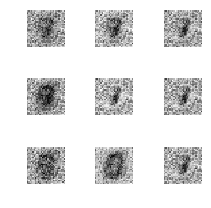

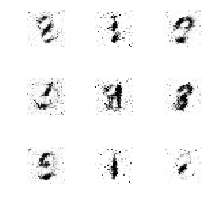

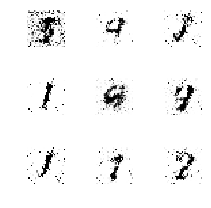

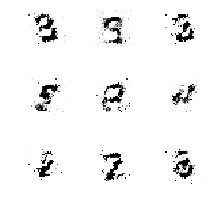

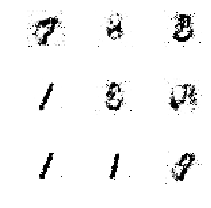

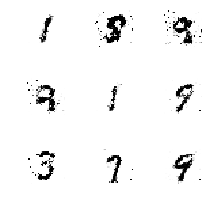

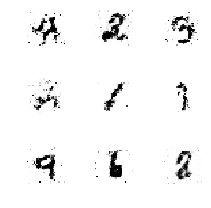

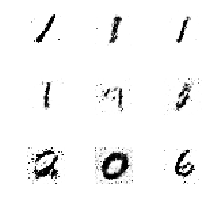

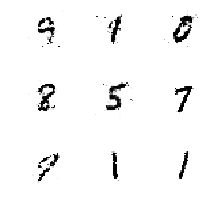

In [28]:
train( 40,512)